In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical graphs
%matplotlib inline 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-playstore-apps/Google-Playstore.csv


In [2]:
'''
The primary goal of this portfolio is to conduct an analysis of the Google Play Store apps, aiming to identify patterns
associated with their intrinsic features and their achievements in comparison to other applications.
'''

'\nThe primary goal of this portfolio is to conduct an analysis of the Google Play Store apps, aiming to identify patterns\nassociated with their intrinsic features and their achievements in comparison to other applications.\n'

In [3]:
df = pd.read_csv("/kaggle/input/google-playstore-apps/Google-Playstore.csv")
pd.set_option('display.max_columns', None)
pd.concat([df.head(5), df.tail(5)])

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,USD,77M,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,appoworld,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19
2312943,Biliyor Musun - Sonsuz Yarış,com.yyazilim.biliyormusun,Trivia,5.0,12.0,100+,100.0,354,True,0.0,USD,5.2M,5.0 and up,Y Yazılım,NaN,yyazilimdevelop@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://biliyor-musun-sons.flycricket.io/priva...,True,False,False,2021-06-16 12:59:19


In [4]:
df.columns 
print(df.columns)


Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')


In [5]:
df.shape

(2312944, 24)

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [7]:
'''
This section is responsible for the data cleaning process,
aimed at optimizing the data to achieve more accurate results.

'''

'\nThis section is responsible for the data cleaning process,\naimed at optimizing the data to achieve more accurate results.\n\n'

In [8]:
df.isnull().sum().sort_values(ascending = False)


Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  5
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [9]:
'''
This dataset exhibits a significant number of missing null values.
Consequently, handling these missing values will be essential.
'''

'\nThis dataset exhibits a significant number of missing null values.\nConsequently, handling these missing values will be essential.\n'

In [10]:
df.dropna(subset = ['App Name','Size','Currency','Installs','Minimum Installs','Developer Id','Developer Email'], inplace = True)
df.shape

(2312545, 24)

In [11]:
'''
The code removed the rows where at least one of the specified columns had a missing value,

'''

'\nThe code removed the rows where at least one of the specified columns had a missing value,\n\n'

In [12]:
df['App Id'].duplicated().any()

False

In [13]:
'''
The code checked for identical app IDs, and since none were found,
there are no duplicate apps in the dataset.

'''

'\nThe code checked for identical app IDs, and since none were found,\nthere are no duplicate apps in the dataset.\n\n'

In [14]:
'''
This session will focus on standardizing the data types
in each column to prevent any potential issues during the analysis.
'''

'\nThis session will focus on standardizing the data types\nin each column to prevent any potential issues during the analysis.\n'

In [15]:
df['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [16]:
df['Installs'] = df['Installs'].astype(str)  # Convert it to a string
df['Installs'] = df['Installs'].str.split('+').str[0]  # Removes the '+' symbol
df['Installs'].replace(',', '', regex=True, inplace=True)  # Replace the commas ',' in the Install column
df['Installs'] = df['Installs'].astype(int)  # Convert it to the int type
df['Installs'].unique()

array([         10,        5000,          50,         100,        1000,
               500,       50000,       10000,           1,      500000,
            100000,           5,    10000000,     1000000,     5000000,
                 0,   100000000,    50000000,  1000000000,   500000000,
        5000000000, 10000000000])

In [17]:
df['Currency'].unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [18]:
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [19]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x) # Only keeps the number

In [20]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '.') if ',' in str(x) else x) # Replaces commas with periods

In [21]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x) # Kbs to Mbs

In [22]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x) # String to 0

In [23]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'G' in str(x) else x) # Gbs to Mbs

In [24]:
df['Size'] = df['Size'].apply(lambda x: float(x)) # to float

In [25]:
df['Minimum Android'].unique()

array(['7.1 and up', '5.0 and up', '4.0.3 and up', '4.1 and up',
       '6.0 and up', '4.4 and up', '4.0 and up', '4.2 and up',
       '2.1 and up', '7.0 and up', '2.2 and up', '2.3 and up',
       '4.3 and up', '5.1 and up', nan, '1.6 and up', '3.0 and up',
       'Varies with device', '8.0 and up', '2.3.3 and up', '4.4W and up',
       '3.2 and up', '1.5 and up', '4.0.3 - 7.1.1', '3.1 and up',
       '2.0 and up', '1.0 and up', '1.1 and up', '2.0.1 and up',
       '4.4 - 6.0', '2.1 - 4.4', '4.0 - 5.0', '2.0 - 2.3.4', '2.2 - 4.4',
       '4.1 - 7.0', '4.1 - 6.0', '4.0 - 4.4W', '4.0 - 4.4', '4.0.3 - 7.0',
       '2.3 - 5.0', '4.0 - 7.1.1', '4.1 - 7.1.1', '4.0 - 7.0',
       '4.1 - 8.0', '4.0 - 6.0', '2.3 - 7.0', '4.0 - 8.0', '2.3 - 6.0',
       '2.1 - 2.3.4', '3.0 - 4.1.1', '2.2 - 3.0', '2.0 - 8.0',
       '4.0.3 - 8.0', '3.0 - 4.4W', '4.4 - 7.1.1', '4.4 - 8.0',
       '4.0.3 - 6.0', '1.6 - 4.0.4', '8.0', '2.3 - 5.1', '2.1 - 7.1.1',
       '2.3 - 4.4W', '4.4 - 7.0', '6.0 - 7.1.1', '2.3

In [26]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [27]:
df['Released'].unique()

array(['Feb 26, 2020', 'May 21, 2020', 'Aug 9, 2019', ..., 'Jun 10, 2010',
       'Apr 10, 2010', 'Mar 29, 2010'], dtype=object)

In [28]:
df['Last Updated'].unique()

array(['Feb 26, 2020', 'May 06, 2021', 'Aug 19, 2019', ...,
       'Jun 03, 2011', 'May 14, 2011', 'Dec 20, 2010'], dtype=object)

In [29]:
df['Privacy Policy'].unique()

array(['https://beniyizibyose.tk/projects/',
       'https://dev4phones.wordpress.com/licencia-de-uso/',
       'https://www.vietnamairlines.com/vn/en/terms-and-conditions/privacy-policy',
       ..., 'http://www.oru.edu/about-oru/privacy-policy.php',
       'https://appoworld.000webhostapp.com/datastructure.html',
       'https://biliyor-musun-sons.flycricket.io/privacy.html'],
      dtype=object)

In [30]:
df['Scraped Time'].unique()

array(['2021-06-15 20:19:35', '2021-06-15 20:19:36',
       '2021-06-15 20:19:37', ..., '2021-06-16 12:30:53',
       '2021-06-16 12:30:54', '2021-06-16 12:30:55'], dtype=object)

In [31]:
df['Free'].unique()

array([ True, False])

In [32]:
df['Type'] = np.where(df['Free'] == True,'Free','Paid') # True to Free, False to Paid
df.drop(['Free'],axis=1, inplace= True ) # Modify Free to be Type

In [33]:
'''
 Certain columns in our dataset do not meet the criteria of our analysis, rendering them irrelevant. 
 These columns include: 'App Id', 'Developer Id', 'Developer Website', 'Developer Email', 'Privacy Policy', 'Scraped Time'
'''

"\n Certain columns in our dataset do not meet the criteria of our analysis, rendering them irrelevant. \n These columns include: 'App Id', 'Developer Id', 'Developer Website', 'Developer Email', 'Privacy Policy', 'Scraped Time'\n"

In [34]:
df.drop(['App Id'], axis=1, inplace=True)

In [35]:
df.drop(['Developer Id'], axis=1, inplace=True)

In [36]:
df.drop(['Developer Website'], axis=1, inplace=True)

In [37]:
df.drop(['Developer Email'], axis=1, inplace=True)

In [38]:
df.drop(['Privacy Policy'], axis=1, inplace=True)

In [39]:
df.drop(['Scraped Time'], axis=1, inplace=True)

In [40]:
df.head(5)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Type
0,Gakondo,Adventure,0.0,0.0,10,10.0,15,0.0,USD,10.0,7.1 and up,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,Free
1,Ampere Battery Info,Tools,4.4,64.0,5000,5000.0,7662,0.0,USD,2.9,5.0 and up,"May 21, 2020","May 06, 2021",Everyone,True,False,False,Free
2,Vibook,Productivity,0.0,0.0,50,50.0,58,0.0,USD,3.7,4.0.3 and up,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,Free
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10,10.0,19,0.0,USD,1.8,4.0.3 and up,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,Free
4,GROW.me,Tools,0.0,0.0,100,100.0,478,0.0,USD,6.2,4.1 and up,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,Free


In [41]:
'''
Questions:

 1. Which app categories have the highest average user ratings, 
    and do these highly-rated categories also have a significant number of user ratings?
   
 2. Is there a correlation between the app's size and the number of in-app purchases?
    
 3. Are apps with in-app purchases generally more expensive than paid apps, and does this vary by app category?
       
 4. Is there a significant difference in app sizes between apps that are ad-supported and those that are not,
    and does this difference vary by app category?
        
'''

"\nQuestions:\n\n 1. Which app categories have the highest average user ratings, \n    and do these highly-rated categories also have a significant number of user ratings?\n   \n 2. Is there a correlation between the app's size and the number of in-app purchases?\n    \n 3. Are apps with in-app purchases generally more expensive than paid apps, and does this vary by app category?\n       \n 4. Can we identify any patterns in the release and update dates of apps, and are certain days of the week or months more popular for releases?\n       \n 5. Is there a significant difference in app sizes between apps that are ad-supported and those that are not,\n    and does this difference vary by app category?\n        \n"

In [42]:
'''
1. Which app categories have the highest average user ratings, 
and do these highly-rated categories also have a significant number of ratings counts?

'''

'\n1. Which app categories have the highest average user ratings, \nand do these highly-rated categories also have a significant number of user ratings?\n\n'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Adventure'),
  Text(1, 0, 'Tools'),
  Text(2, 0, 'Productivity'),
  Text(3, 0, 'Communication'),
  Text(4, 0, 'Social'),
  Text(5, 0, 'Libraries & Demo'),
  Text(6, 0, 'Lifestyle'),
  Text(7, 0, 'Personalization'),
  Text(8, 0, 'Racing'),
  Text(9, 0, 'Maps & Navigation'),
  Text(10, 0, 'Travel & Local'),
  Text(11, 0, 'Food & Drink'),
  Text(12, 0, 'Books & Reference'),
  Text(13, 0, 'Medical'),
  Text(14, 0, 'Puzzle'),
  Text(15, 0, 'Entertainment'),
  Text(16, 0, 'Arcade'),
  Text(17, 0, 'Auto & Vehicles'),
  Text(18, 0, 'Photography'),
  Text(19, 0, 'Health & Fitness'),
  Text(20, 0, 'Education'),
  Text(21, 0, 'Shopping'),
  Text(22, 0, 'Board'),
  Text(23, 0, 'Music & Audio'),
  Text(24, 0, 'Sports'),
  Text(25, 0, 'Beauty'),
  Text(26, 0, 'Business'),

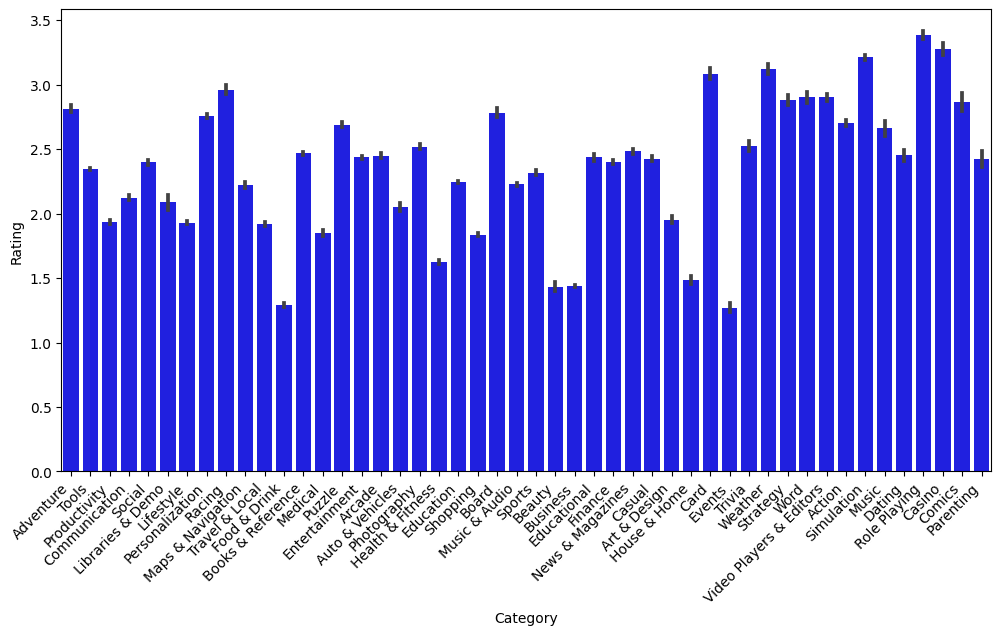

In [44]:
group_paid = df.groupby('Category')['Rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Rating', data=df, label='Paid Apps', color='blue')
plt.xticks(rotation=45, ha='right')


In [ ]:
'''

After analyzing the Google Play Store dataset, we focused on user ratings across different app categories.
Itś possible to conclude that the highted rated app category was parenting, with the average of 47.


'''

In [53]:
glo = df['Rating Count'].mean()

pa = df[df['Category'] == 'Parenting']['Rating Count'].mean()
print(glo)
print(pa)

2864.9426521622745
1743.4109989373007


In [ ]:
'''
The analysis of the dataset reveals that the rating count for apps in the 'Parenting' category is significantly lower
compared to the general rating count across all categories. This suggests that a high rating doesn't necessarily translate
to a high user rating.

'''

In [ ]:
'''
2. Is there a correlation between the app's size and the number of in-app purchases?

'''

In [ ]:
# Scatter plot for visual inspection
plt.figure(figsize=(10, 6))
plt.scatter(df['Size'], df['In App Purchases'])
plt.title('Scatter Plot: App Size vs. In App Purchases')
plt.xlabel('App Size')
plt.ylabel('In-App Purchases')
plt.show()

In [ ]:
df['Size'].count()

In [ ]:
((df['Size'] < 600) & (df['Size'] >0)).sum()

In [ ]:
'''
It is noteworthy that the majority of apps offering in-app purchases are concentratedin the size range of 600 MB and below.
Interestingly, a similar pattern emerges for apps without in-app purchases.
This observation suggests that the observed pattern is not solely attributed to app sizes concerning in-app purchases.
Instead, it appears to be a broader trend influenced by other factors, suchas a prevalence of apps in the dataset being
below 600 MB.

'''

In [ ]:
# Calculate Pearson correlation coefficient
correlation = df['Size'].corr(df['In App Purchases'])

print(f"Pearson Correlation Coefficient: {correlation}")
plt.show()

In [ ]:
'''
Given the low Pearson correlation coefficient, it can be inferred that there exists a very weak positive correlation.
This weak correlation is likely influenced by the specific arrangement of the dataset, 
indicating that other factors play a major role in the observed relationship

'''

In [ ]:
'''
3. Are apps with in-app purchases generally more expensive than paid apps, and does this vary by app category?

'''

In [ ]:
Price_Inapp = df[df['In App Purchases'] == True]['Price'].mean()
Price_paid = df[df['Type'] == 'Paid']['Price'].mean()

print(Price_Inapp)
print(Price_paid)

In [ ]:
'''
Upon comparing the two averages, we observe a notable difference. The average price of paid apps appears to be 
significantly higher than the average price of apps with in-app purchases. 
This finding suggests that users might be willing to pay a premium for apps without in-app purchases.

'''

In [ ]:
paid = df[df['Type'] == 'Paid']
inapp = df[df['In App Purchases'] == True]

group_paid = paid.groupby('Category')['Price'].mean().reset_index()
group_inapp = inapp.groupby('Category')['Price'].mean().reset_index()

merge = pd.merge(group_paid, group_inapp, on ='Category', suffixes=('Paid', 'InApp'))

plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='PricePaid', data=merge, label='Paid Apps', color='blue')
sns.barplot(x='Category', y='PriceInApp', data=merge, label='In-App Purchase Apps', color='orange')
plt.title('Average Prices of Paid Apps and Apps with In-App Purchases by Category')
plt.xlabel('App Category')
plt.ylabel('Average Price')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
'''
Based on the analysis, it can be concluded that, on average,
the pricing patterns for paid apps and apps with in-app purchases remained consistent across different app categories.
This suggests that factors other than payment models may have a more dominant influence on app pricing.

'''

In [ ]:
'''
4. Is there a significant difference in app sizes between apps that are ad-supported and those that are not,
and does size vary by app category?

'''

In [ ]:
ad = df[df['Ad Supported'] == True]['Size'].mean()
noad = df[df['Ad Supported'] == False]['Size'].mean()
mean = df['Size'].mean()
std1 = df['Size'].std()
std2 = df['Size'].std()
pooled_sd = ((std1**2 + std2**2) / 2)**0.5
cohen_d = (ad - noad) / pooled_sd

print(f"Cohen's d: {cohen_d:.2f}")
print(ad)
print(noad)



In [ ]:
'''
Given that the calculated Cohen's d is less than 0.2,
we interpret this result to mean that the difference between the means is not considered substantial.
In Cohen's d terminology, a value below 0.2 is often categorized as a small effect size,
indicating a limited practical significance in the observed difference between the two groups

'''

In [ ]:
groups = df.groupby('Category')['Size']
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(*[group.values for name, group in groups])

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

In [ ]:
'''

Given the F-statistic value and p-value is possible to affirm the there is a great size variation between apps by category,
and its difference is strongly corelated with its specific category.


'''